In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime

In [17]:
df_in = pd.read_csv('data/USvideos.csv')

In [18]:
df_in.shape

(40949, 16)

In [19]:
pd.options.display.max_colwidth = 100

In [20]:
df_in.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
31667,a73YoV2uf6g,18.29.04,"Antonio Banderas Can Play Picasso, But Can He Draw Like Him?",The Late Show with Stephen Colbert,22,2018-04-20T07:59:41.000Z,"The Late Show|""Late Show""|""Stephen Colbert""|""Steven Colbert""|""Colbert""|""celebrity""|""celeb""|""cele...",626732,5471,309,690,https://i.ytimg.com/vi/a73YoV2uf6g/default.jpg,False,False,False,'Genius: Picasso' star Antonio Banderas tells the history of the famous artist with whom he shar...
32541,XaKDp3ijSx0,18.03.05,What is the BEST Fruit?,GingerPale,23,2018-04-18T16:41:49.000Z,"gingerpale|""animated""|""animation""|""best fruit""|""what is the best fruit""|""fruits""|""fruit""|""food""|...",622036,31590,508,27134,https://i.ytimg.com/vi/XaKDp3ijSx0/default.jpg,False,False,False,Let's learn some useless stuff and great opinions with GingerPale.PSDoesn't it bug you that vegg...
4244,-rZkKvRZ0UE,17.05.12,Pizza night!,"European Space Agency, ESA",28,2017-12-02T20:01:53.000Z,"Pizza kit|""Paolo Nespoli""|""international space station""|""Expedition 53""|""pizza in space""",122648,1643,64,218,https://i.ytimg.com/vi/-rZkKvRZ0UE/default.jpg,False,False,False,The Expedition 53 crew received a surprise with the recent arrival of the Cygnus spacecraft at t...
8713,AaALLWQmCdI,17.27.12,Making new sounds using artificial intelligence,ANDREW HUANG,10,2017-12-21T15:30:00.000Z,"andrew|""huang""|""andrew huang""|""music""|""musician""|""producer""|""song""|""canadian""|""canada""|""toronto""...",115055,8955,93,1582,https://i.ytimg.com/vi/AaALLWQmCdI/default.jpg,False,False,False,RAINBOWGRAM stream/download:\nSpotify https://open.spotify.com/track/46EJMCFAIQ62SoZBFcIRb7\niTu...
32364,OrnpSe4OChM,18.03.05,Mean Tweets – Avengers Edition,Jimmy Kimmel Live,23,2018-05-01T03:57:23.000Z,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late night""|""talk show""|""funny""|""comedic""|""comedy""|""cl...",8751813,215764,6265,15989,https://i.ytimg.com/vi/OrnpSe4OChM/default.jpg,False,False,False,Avengers: Infinity War just set the record for the biggest movie opening ever. But even Avengers...


In [21]:
import json
from pprint import pprint

with open('data/IN_category_id.json') as f:
    data = json.load(f)

pprint(data)

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [22]:
genre_id = dict()
for i in range(30):
    genre_id[int(data['items'][i]['id'])] = data['items'][i]['snippet']['title']

In [23]:
genre_id_df = pd.DataFrame.from_dict(genre_id,orient='index').reset_index()
genre_id_df.columns = ['category_id','genre']
genre_id_df.head(10)

,category_id,genre
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [24]:
df_in = pd.merge(genre_id_df, df_in, on='category_id')

Fixing the date formats in the 'trending_date' and 'publish_time' columns and converting them into datetime format

In [25]:
df_in['trending_date'] = df_in['trending_date'].apply(lambda x: '-'.join([x.split('.')[i] for i in [1,2,0]]))
df_in['publish_time'] = df_in['publish_time'].apply(lambda x: '-'.join([re.findall(r"[\d]+", x)[i] for i in [2,1,0]]))
df_in['trending_date'] = df_in['trending_date'].apply(lambda x: datetime.strptime(x, '%d-%m-%y'))
df_in['publish_time'] = df_in['publish_time'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

Next, we create some new columns and drop few columns that we won't require for this project and rearrange the order of columns to make them more readable

In [26]:
df_in['days_to_trend'] = df_in['trending_date']-df_in['publish_time']
df_in['likes_ratio'] = df_in['likes']/(df_in['likes']+df_in['dislikes'])

In [27]:
df_in = df_in.drop(columns=['category_id', 'video_id', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed'])
df_in = df_in[['publish_time','trending_date', 'days_to_trend','title','channel_title','genre','description','views', 'likes_ratio', 'comment_count','tags']]

Exploring the data to see which genre is most trending

C:\Users\Dikshant\Anaconda3\envs\youtube\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


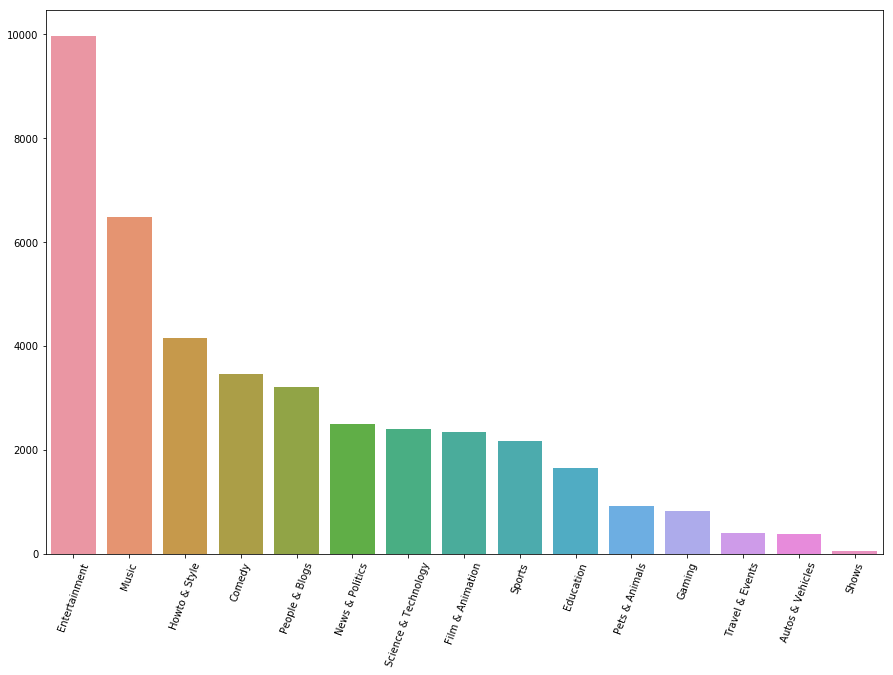

In [73]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=70)
sns.barplot(df_in.genre.value_counts().index, df_in.genre.value_counts().values)

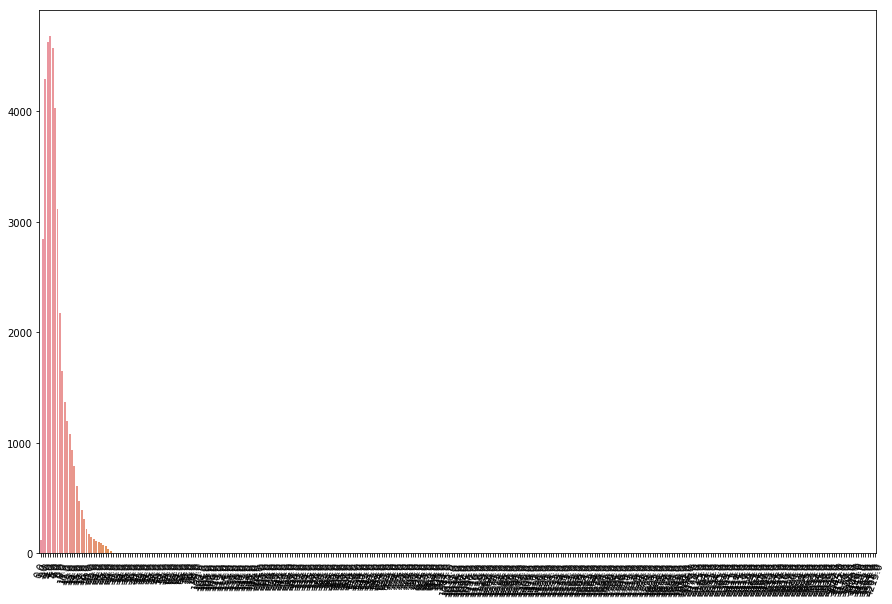

In [76]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=70)
sns.barplot(df_in['days_to_trend'].astype('timedelta64[D]').value_counts().index, df_in['days_to_trend'].astype('timedelta64[D]').value_counts().values)

In [30]:
df_in.sample(20)

,publish_time,trending_date,days_to_trend,title,channel_title,genre,description,views,likes_ratio,comment_count,tags
21983,2017-12-16,2017-12-20,4 days,Introducing Communist Amazon Echo,grandayy,Entertainment,Twitter: https://twitter.com/grande1899\nFacebook page: https://www.facebook.com/drgrandayy\nAlw...,868985,0.967631,3885,"amazon echo|""amazon alexa""|""amazon echo parody""|""alexa""|""russian amazon alexa""|""communist amazon..."
26820,2018-04-01,2018-04-05,4 days,teens react to nothing.,FBE,Entertainment,Check back at 2:00 PT for our real episode of REACT\nWatch all main React episodes (Kids/Teens/E...,3448518,0.945832,24493,"April Fool's Day|""April Fool's""|""Prank""|""teens react to nothing.""|""teens react""|""react""|""reactio..."
31485,2018-01-30,2018-02-04,5 days,Investigating Concussions in the N.F.L. | The Truth Has a Voice | The New York Times,The New York Times,News & Politics,"In this commercial, The Times highlights our investigative reporting on head trauma in the N.F.L...",13505,0.966667,14,[none]
11459,2018-03-13,2018-03-21,8 days,March Madness Stereotypes,Dude Perfect,Sports,"March Madness Stereotypes. Love 'em or Hate 'em, we all know 'em.\n► Click HERE to subscribe to ...",10527804,0.967139,20847,"dude perfect|""dude perfect stereotypes""|""dude perfect water bottle flip""|""bottle flip""|""water bo..."
9809,2018-03-03,2018-03-15,12 days,A Friendly Arctic Fox Greets Explorers | National Geographic,National Geographic,Pets & Animals,"In the frozen landscape of the Canadian Arctic, one Arctic fox got very curious about one human ...",772086,0.988825,1079,"national geographic|""nat geo""|""natgeo""|""animals""|""wildlife""|""science""|""explore""|""discover""|""surv..."
12805,2018-01-12,2018-01-13,1 days,Big sister reflexes,BrasherN,Gaming,NaN,80760,0.932815,168,[none]
37076,2017-12-19,2017-12-23,4 days,Why We Should Not Watch Quite so Much News,The School of Life,Education,We're always being told that the sign of a good and intelligent person is someone who keeps up w...,93974,0.940915,595,"the school of life|""education""|""relationships""|""alain de botton""|""philosophy""|""London""|""talk""|""s..."
26117,2018-03-13,2018-03-23,10 days,Ready Player One Review,IGN,Entertainment,Did director Steven Spielberg do the pop culture-loaded bestseller justice?\n\nSubscribe to IGN ...,461133,0.904358,1522,"tj|""IGN""|""movie""|""Review""|""Sci-Fi""|""Ready Player One""|""Warner Bros. Pictures"""
12264,2018-05-28,2018-06-09,12 days,Scuba Diving and Fishing Underwater in a Crystal Clear Pond! (Caught a Fish 26ft Deep),DALLMYD,Sports,"Subscribe if you're new! Help me reach 5,000,000 subscribers on YouTube!! https://goo.gl/tXzZYd ...",1010433,0.967433,2700,"river treasure|""fishing videos""|""new fishing""|""scuba diving""|""fishing underwater challenge""|""riv..."
27971,2018-04-30,2018-05-05,5 days,People who had ONE JOB and failed miserably,AzzyLand,Entertainment,SUBSCRIBE and become part of the AzzyLand family :D People who had ONE JOB and failed miserablyH...,637113,0.815412,3687,"azzyland|""azzy""|""reaction""|""reacting""|""funny""|""people""|""who""|""had""|""one""|""job""|""and""|""failed""|""m..."


# what trending videos have in common
tags(NLP), ratio, comments, views, genre, 
description, title wordcloud
description sentiment analysis
trend of upload videos through the year across different countries
dealing with other language
